# Linear and Logistic Regression Intro

## Linear Regression Algorithm

### What is Linear Regression?

Linear equation that combines input data (x values) to predict the output value (y values) based on the input data. This then forms a factor for each set of input values, otherwise known as coefficients and can be seen as follows:

                            y = β0 + β1x1 + β2x2

This equation represents a plane known as a hyperplane. 

Below we will explore a simple linear regression example based on the diabetes dataset found in sklearn.

In [26]:
#our imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from scipy import stats

In [5]:
#load the diabetes dataset
diabetes = datasets.load_diabetes()

In [7]:
#select one feature
diabetes_X = diabetes.data[:, np.newaxis,2]
    
#split data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

#split targets into train/test sets
diabetes_y_train = diabetes.target[:-20] 
diabetes_y_test = diabetes.target[-20:]

In [8]:
#create linear regression object
regr = linear_model.LinearRegression()

In [9]:
#train model using training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#display coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [938.23786125]


In [14]:
#display mean squared error
print("Mean squared error: %.2f" % 
      np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2))

Mean squared error: 2548.07


In [15]:
#display variance square
print('Variance score: %.2f' % 
      regr.score(diabetes_X_test, diabetes_y_test)) 

Variance score: 0.47


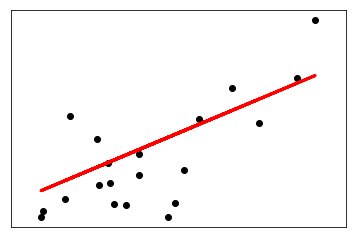

In [32]:
#plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, 
         regr.predict(diabetes_X_test), color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


## Logistic Regression

### What is Logistic Regression?

A model that is used when the dependent variable is categorical in nature.

Some use cases include the following:
    - Image Categorization
    - Handwriting recogniition
    - Predicting probabilities
    
We essentially predict the probability that a given example belongs to a certain class over the other class.

This can be mathematically represented as follows:

   P(y = 1 | x) = hθ(x) = 1 / (1 + exp (-θ^Tx))
   P(y = 0 | x) = 1 - P(y = 1 | x) = 1 - hθ(x)
   
 The function of  1 / (1 + exp(-z)) is called the sigmoid function. This is essentially a S shaped function that restricts the values of z into the a range spanning from 0 to 1. This aids with assigning probabilities to either the '0' or '1' class.
 
 Below we will apply the logistic regression model on the iris dataset from sklearn.

In [34]:
# our imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [35]:
#import dataset
iris = datasets.load_iris()
X = iris.data[:, :2] #work with first two features
Y = iris.target
h = .02 #step size

In [38]:
# establish log regression
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X,Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

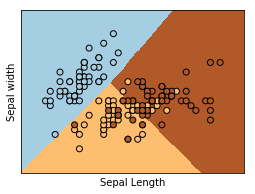

In [46]:
#plot decision boundaries
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx,yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min,y_max,h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

#plot training points
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()